<a href="https://colab.research.google.com/github/verryp/dts-deep-learning-project/blob/dev/Final_Project_DTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT FGA (MACHINE LEARNING) - DTS 2019


---


### Nama Kelompok :
- Joan Anindya 
- Regina Olivia
- Sarah Yohana 
- Sherly 
- Verryanto Paulus



---
### Sumber :
<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1-YmLCghEhim0ysyZweLfBfSuBEEYdXjw"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/verryp/dts-deep-learning-project/blob/master/Final_Project_DTS.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>


# Fashion MNIST DATASETS

---



Klasifikasi gambar digunakan dalam beberapa aplikasi, mulai dari mengenali penyakit
yang mengancam jiwa dalam pemindaian medis, hingga mendeteksi suatu hal


Dataset MNIST (biasa disebut) adalah dataset yang paling sering digunakan sebagai
permulaan pembelajaran klasifikasi gambar. Komunitas data saintis menyukai dataset ini
dan menggunakannya sebagai tolak ukur untuk melakukan validasi terhadap algoritma mereka. Faktanya,
MNIST seringkali menjadi dataset pertama para peneliti yang dicoba.



  >    "Jika algoritmanya tidak bisa bekerja pada MNIST, algoritma tersebut pasti tidak akan bisa bekerja untuk dataset lainnya. Jika algoritmanya bekerja pada MNIST, permulaan yang bagus, namun bukan berarti dapat bekerja untuk dataset lainnya."
  
  
Peneliti dari Zalando (sebuah perusahaan e-commerce) telah mengembangkan dataset
klasifikasi gambar baru yang disebut dengan Fashion MNIST dengan harapan dapat
menggantikan MNIST. Dataset baru ini berisi gambar baju dan aksesoris, seperti: kemeja,
tas, sepatu, dan barang mode lainnya.

Fashion MNIST berisi 55,000 training set dan 10,000 test set. Serupa dengan MNIST, setiap
data Fashion MNIST merupakan sebuah gambar skala abu (grayscale) berukuran 28x28
pixel. Masing-masing data memiliki label asosiasinya yang terdiri dari 10 kelas

Label|Description|Label|Description
--- | --- |--- | ---
0|T-shirt/top|5|Sandal
1|Trouser|6|Shirt
2|Pullover|7|Sneaker
3|Dress|8|Bag
4|Coat|9|Ankle boot

## Dependency & Data Preparation

### Download Datasets

In [41]:
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-18 20:12:53--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.74.70
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.74.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  11.7MB/s    in 2.2s    

2019-08-18 20:12:55 (11.7 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-18 20:12:57--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazo

### Import Library

In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from tensorflow.keras.models import Sequential # JenisModel
from tensorflow.keras.layers import Dense #Sebuah lapisan untuk MLP -> bisa berupa layer input,hidden, ataupun output
from tensorflow.keras.utils import to_categorical #Mengubah label 0-9 menjadi representasi yang bisa diproses oleh keras
from tensorflow.keras.optimizers import Adam # Untuk optimisasi layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.examples.tutorials.mnist import input_data #Dataset fashion mnist dari keras

### Get Dataset

In [43]:
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion')

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


## Preprocessing Data

### Show Data

In [44]:
# Shapes of training set
x_train, y_train = fashion_mnist.train.images, fashion_mnist.train.labels

print("Training set (images) shape: {shape}".format(shape=x_train.shape))
print("Training set (labels) shape: {shape}".format(shape=y_train.shape))

# Shapes of test set
x_test, y_test = fashion_mnist.test.images, fashion_mnist.test.labels
print("\nTest set (images) shape: {shape}".format(shape=x_test.shape))
print("Test set (labels) shape: {shape}".format(shape=y_test.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)

Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000,)


Random 10 image dari data training : 


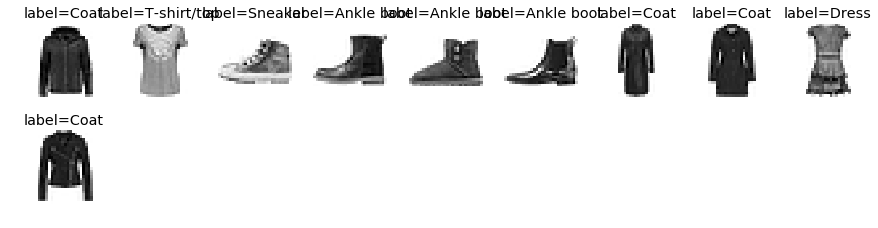

In [45]:
# Set label dalam bentuk huruf -> agar bisa dibaca dengan baik
class_names = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  9:'Bag',
                  9:'Ankle boot'}

# proses menampilkan data dengan bantuan lib matplotlib
print("Random 10 image dari data training : ")
plt.figure(figsize=(15,10))
for i in range(10):  
    plt.subplot(5, 9, i+1)
    plt.imshow(
        x_train[i].reshape((28,28)),
        cmap=plt.cm.binary)
    plt.title("label=%s" % class_names[y_train[i]],y=1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

### Data Visualization

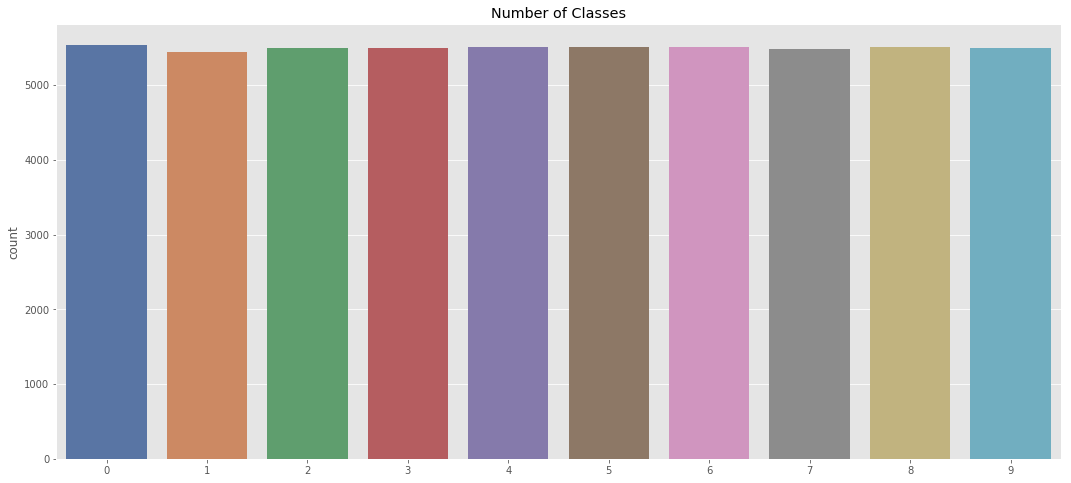

In [46]:
# Plotting jumlah data terhadap masing-masing label
plt.figure(figsize=(18, 8))
sns.countplot(y_train, palette="deep")
plt.title("Number of Classes")
plt.show()

### Rescaling and Reshape Data

In [47]:
# Melakukan reshape data menjadi 4 dimensi (batch size, width, weight, dan channel)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Melakukan rescale dari 0-255 menjadi 0-1 untuk mempercepat perhitungan dengan range data yang besar dengan membagi 255
x_train /= 255
x_test /= 255

# Merubah output ke dalam one-hot vectore
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('x_train shape : ', x_train.shape)
print('Banyak gambar di x_train : ', x_train.shape[0])

print('Banyak gambar di x_test', x_test.shape[0])

x_train shape :  (55000, 28, 28, 1)
Banyak gambar di x_train :  55000
Banyak gambar di x_test 10000


## Training Data

### Modeling Data CNN - 1

In [48]:
input_shape = (28, 28, 1)
# ==========================================================BAGAIN PERTAMA========================================================
# # Membuat model
# model = Sequential()

# model.add(Conv2D(filters=64, 
#                  kernel_size=2, 
#                  padding='same', 
#                  activation='relu', 
#                  strides=1, 
#                  input_shape=input_shape))
# # Conv2D
# # - filters = jumlah node. mirip seperti Dense
# # - kernel_size = jumlah node yang bergeser. 2 artinya matrik 2x2
# # - strides = bergesernya pixel ke kanan sebanyak 1 kolom
# # - padding = merupakan garis putus (sisa/tambahan pixel dari hasil stride) untuk membantu proses perhitungan
# #       => value 'same' artinya padding akan diberikan sebagaimana hasil proses perhitungan sama dengan input 
# #       => input 28x28x1 maka menjadi 28x28x64. 28x28 tidak berubah karena 'same'

# model.add(MaxPooling2D(pool_size=2))
# # MaxPooling2D
# # - untuk memperkecil ukuran dari Conv2D dengan cara mengambil angka tersebar untuk setiap setingan pixel matrik dalam hal ini 2x2 dalam setiap proses
# # - dapat mencegah overfitting

# model.add(Flatten())
# # Flatten
# # - meratakan semua output dari layer sebelumnya sehingga bisa diproses menggunakan Dense
# # - hasil output MaxPool adalah 14x14x64 dan flatten akan meratakan menjadi 12.544 sel
# model.add(Dense(10, activation='softmax'))


# ==========================================================BAGAIN KEDUA========================================================
# Membuat CNN - 2
model = Sequential()

model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=3))

model.add(Dropout(0.05))
model.add(Conv2D(filters=64, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))

model.add(Dropout(0.05))
model.add(Conv2D(filters=128, 
                 kernel_size=3, 
                 padding='same', 
                 activation='relu'))

model.add(Dropout(0.1))
model.add(Flatten())

model.add(Dense(128, activation='relu',))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 128)         73856     
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 9, 128)        

### Fitting Data

Train on 49500 samples, validate on 5500 samples
Epoch 1/50
49500/49500 [==============================] - 5s 110us/sample - loss: 1.2625 - acc: 0.5359 - val_loss: 0.7142 - val_acc: 0.7378
Epoch 2/50
49500/49500 [==============================] - 5s 100us/sample - loss: 0.7260 - acc: 0.7250 - val_loss: 0.6498 - val_acc: 0.7593
Epoch 3/50
49500/49500 [==============================] - 5s 100us/sample - loss: 0.6464 - acc: 0.7527 - val_loss: 0.5520 - val_acc: 0.7865
Epoch 4/50
49500/49500 [==============================] - 5s 101us/sample - loss: 0.5867 - acc: 0.7777 - val_loss: 0.5059 - val_acc: 0.8056
Epoch 5/50
49500/49500 [==============================] - 5s 101us/sample - loss: 0.5377 - acc: 0.7979 - val_loss: 0.4734 - val_acc: 0.8124
Epoch 6/50
49500/49500 [==============================] - 5s 100us/sample - loss: 0.5037 - acc: 0.8141 - val_loss: 0.4545 - val_acc: 0.8265
Epoch 7/50
49500/49500 [==============================] - 5s 103us/sample - loss: 0.4776 - acc: 0.8217 - val_lo

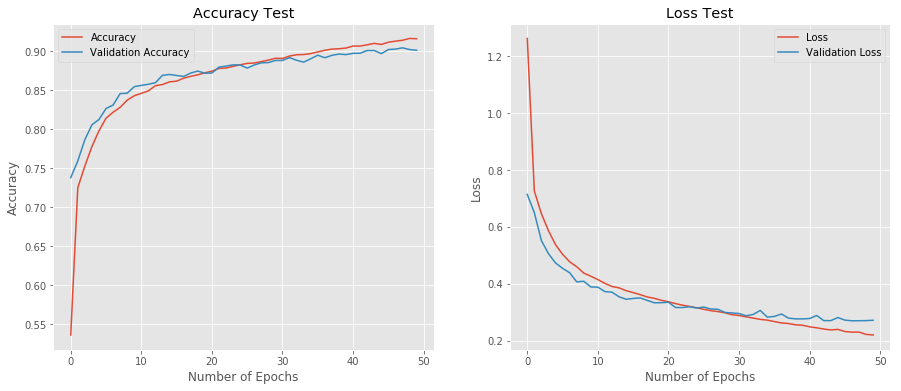

In [49]:
adam = Adam(lr=0.001)
n_epochs = 50
n_bs = 256

# - menggunakan loss function 'categorical_crossentropy' untuk multikategori,
# - adam sebagai optimizer karena performanya yang baik dengan learning rate digunakan 0.001,
# - dan menambahkan paramater metrics 'accuracy' untuk menilai performa model

model.compile(
    optimizer = adam,
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)


# Melakukan training sebanyak 50 kali dengan pembagian validasi data training-test 90%-10% dan batch size 256
history = model.fit(
    x_train, 
    y_train, 
    epochs=n_epochs, 
    validation_split=0.1, 
    batch_size=n_bs)

plt.figure(figsize=(15,6))

# Menampilkan perbedaan loss error dari model dengan loss error dari test data dalam bentuk grafik
plt.subplot(1,2,2)
plt.title('Loss Test')
plt.plot(history.history['loss'], label = "Loss")
plt.plot(history.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend()

# Menampilkan perbedaan akurasi model dengan akurasi tes dalam bentuk grafik
plt.subplot(1,2,1)
plt.title('Accuracy Test')
plt.plot(history.history['acc'], label = "Accuracy")
plt.plot(history.history['val_acc'], label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [0]:
# model.optimizer.lr = 0.0001

# history = model.fit(
#     x_train, 
#     y_train, 
#     epochs=50, 
#     validation_split=0.1, 
#     batch_size=256,
# )

In [51]:
# Melihat akurasi setelah melakukan fitting data
print("Accuracy after fitting: {:.2f}%".format(history.history['acc'][-1]*100))

# Melakukan evaluasi akurasi data dari data test
score = model.evaluate(x_test, y_test)
print('\nTest Accurary : {:.2f}%'.format(score[1]*100))
print('Test Lost : {:.3f}'.format(score[0]) )

Accuracy after fitting: 91.61%
10000/10000 [==============================] - 1s 109us/sample - loss: 0.2882 - acc: 0.9007

Test Accurary : 90.07%
Test Lost : 0.288


### Prediction Data

In [52]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               
# Melakukan prediksi data dari data test
prediction = model.predict(x_test)
Y_pred_classes = np.argmax(prediction, axis = 1)
Y_true = np.argmax(y_test, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred_classes)

# Melakukan looping untuk melihat berapa banyak item dari masing-masing kelas yang diperkirakan benar dan salah
for i in range(len(confusionMatrix)):
    print("\nClass:",str(class_names[i]))
    print("Number of Correct Prediction:", str(confusionMatrix[i][i]), "out of ", len(x_test))
    print("Number of Wrong Prediction:", str(sum(confusionMatrix[i])-confusionMatrix[i][i]), "out of ", len(x_test))
    

print('\n','=='*70)

# Menampilkan persentasi akurasi tes dari masing-masing label
print('\nClassification accuracy for each class:');
for i,j in enumerate(confusionMatrix.diagonal()/confusionMatrix.sum(axis=1)): print(str(class_names[i]), ': %.4f' % j)


Class: T-shirt/top
Number of Correct Prediction: 836 out of  10000
Number of Wrong Prediction: 164 out of  10000

Class: Trouser
Number of Correct Prediction: 968 out of  10000
Number of Wrong Prediction: 32 out of  10000

Class: Pullover
Number of Correct Prediction: 827 out of  10000
Number of Wrong Prediction: 173 out of  10000

Class: Dress
Number of Correct Prediction: 910 out of  10000
Number of Wrong Prediction: 90 out of  10000

Class: Coat
Number of Correct Prediction: 857 out of  10000
Number of Wrong Prediction: 143 out of  10000

Class: Sandal
Number of Correct Prediction: 973 out of  10000
Number of Wrong Prediction: 27 out of  10000

Class: Shirt
Number of Correct Prediction: 725 out of  10000
Number of Wrong Prediction: 275 out of  10000

Class: Sneaker
Number of Correct Prediction: 975 out of  10000
Number of Wrong Prediction: 25 out of  10000

Class: Bag
Number of Correct Prediction: 982 out of  10000
Number of Wrong Prediction: 18 out of  10000

Class: Ankle boot
Num

## Evaluating Data

### Confusion Matrix

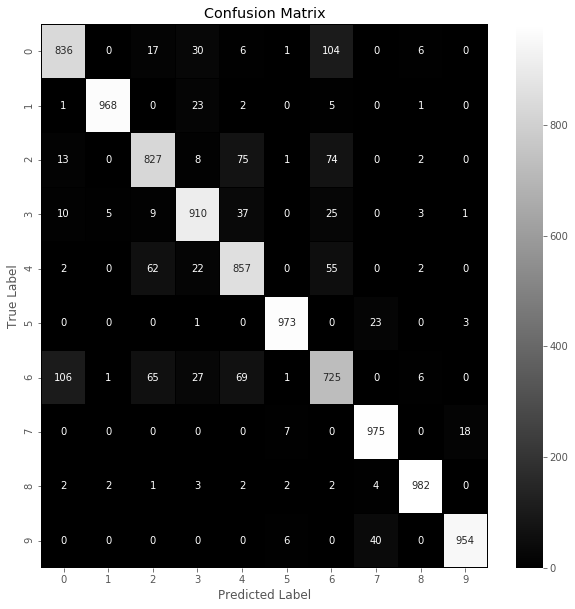

In [53]:
# Melakukan plotting Confusion Matrix
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Accuracy, Precision, Recall, and F1 Model

In [54]:
# Menampilkan hasil evaluasi model dalam bentuk reporting matrik precision,recall, dan f1-score
print(classification_report(Y_true,Y_pred_classes,target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.84      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.83      0.83      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.82      0.86      0.84      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.73      0.72      0.73      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### Visualization of results

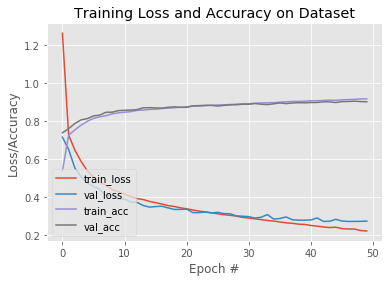

In [55]:
# Menampilkan plotting gbungan hasil training loss and akurasi
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, n_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, n_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

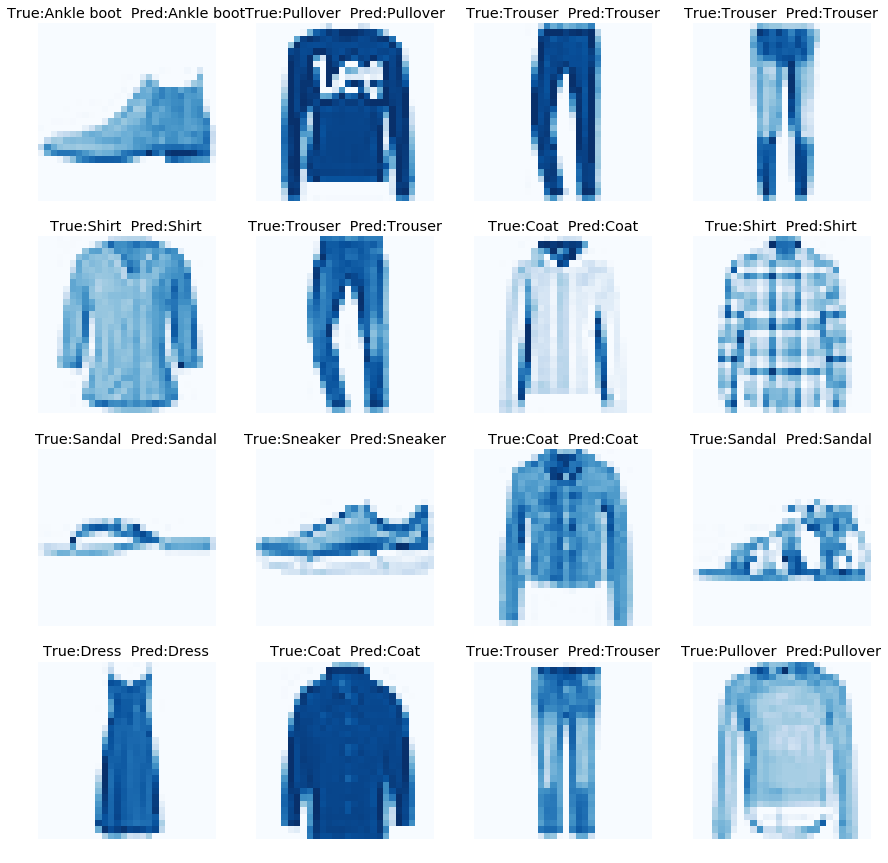

In [56]:
labels = {0:'T-shirt/top',
                  1:'Trouser',
                  2:'Pullover',
                  3:'Dress',
                  4:'Coat',
                  5:'Sandal',
                  6:'Shirt',
                  7:'Sneaker',
                  9:'Bag',
                  9:'Ankle boot'}

# Fungsi untuk memplotting gambar terhadap dataset berdasarkan hasil prediksi
def plot_images(data_index,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(4,4, figsize=(15,15))

    for i, indx in enumerate(data_index[:16]):
        ax[i//4, i%4].imshow(x_test[indx].reshape(28,28), cmap=cmap)
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title("True:{}  Pred:{}".format(labels[Y_true[indx]],labels[Y_pred_classes[indx]]))
    plt.show() 

# Menampilkan visualisasi gambar terhadap prediksi label yang benar
correct = np.nonzero(Y_true == Y_pred_classes)[0]
plot_images(correct)

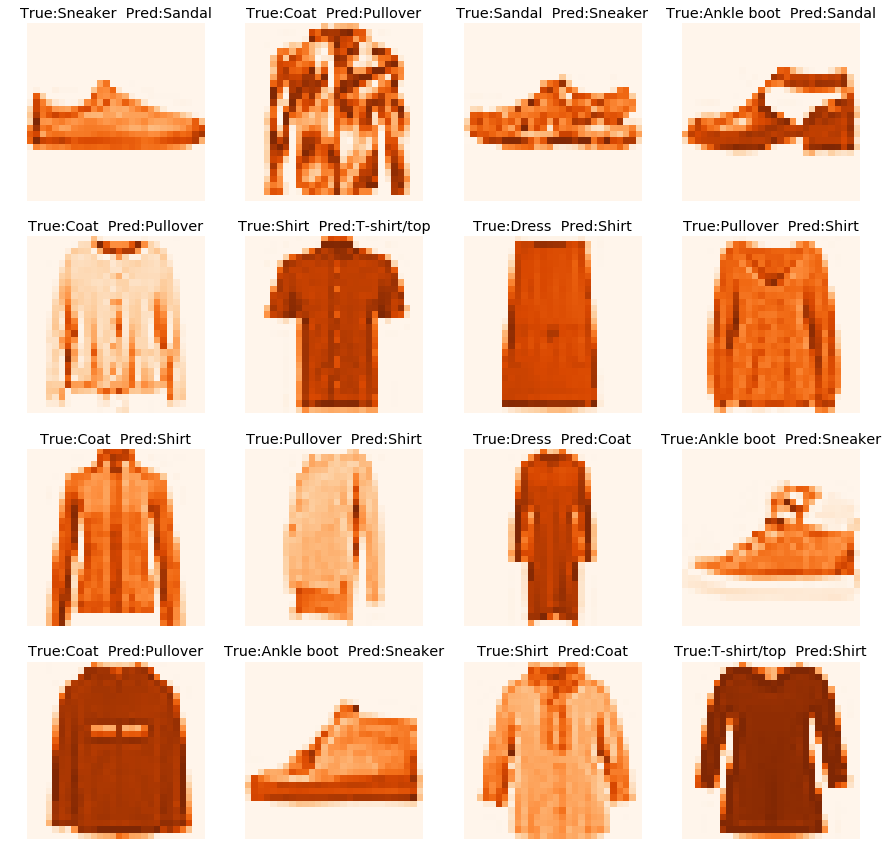

In [57]:
# Menampilkan visualisasi gambar terhadap prediksi label yang salah
incorrect = np.nonzero(Y_true != Y_pred_classes)[0]
plot_images(incorrect, 'Oranges')